In [ ]:
#!pip install fredapi > NUL 2>&1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

%matplotlib inline

# Setting the Plotting Style
plt.style.use('fivethirtyeight')

# Setting the maximum number of columns displayed in the pandas DataFrame to 500
pd.set_option('display.max_columns', 100)

# Getting the color palette used by the current matplotlib style and storing it in 'colour_pal'
colour_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
# You can just put your api key below and forget about the rest of the code
fred_api_key = 'YOUR_API_KEY'

import os
from dotenv import load_dotenv

load_dotenv() # Loading the .env file
fred_api_key = os.getenv('FRED_API_KEY') # Accessing the secret

# 1. Create Fred Object

In [2]:
fred = Fred(api_key=fred_api_key)

# 2. Search Federal Reserve Economic Data (FRED) for Data

In [3]:
search = fred.search('S&P', order_by='popularity')

In [4]:
search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-05-20   2024-05-20   
CSUSHPINSA          CSUSHPINSA     2024-05-20   2024-05-20   
SP500                    SP500     2024-05-20   2024-05-20   
MEHOINUSA672N    MEHOINUSA672N     2024-05-20   2024-05-20   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-05-20   2024-05-20   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-05-17  Daily, Close   
CSUSHPINSA            1987-01-01      2024-02-01       Monthly   
SP500                 2014-05-19      2024-05-17  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-05-17  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-05-20 07:51:09-05:00   
CSUSHPINSA                           NSA  2024-04-30 08:12:01-05:00   
SP500                                NSA  2024-05-17 19:13:29-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-05-20 07:51:12-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

In [5]:
search.shape

(1000, 15)

# 3. Pull Econonic Data and Visualise

In [6]:
sp500 = fred.get_series(series_id='SP500')

In [7]:
sp500

2014-05-19    1885.08
2014-05-20    1872.83
2014-05-21    1888.03
2014-05-22    1892.49
2014-05-23    1900.53
               ...   
2024-05-13    5221.42
2024-05-14    5246.68
2024-05-15    5308.15
2024-05-16    5297.10
2024-05-17    5303.27
Length: 2610, dtype: float64

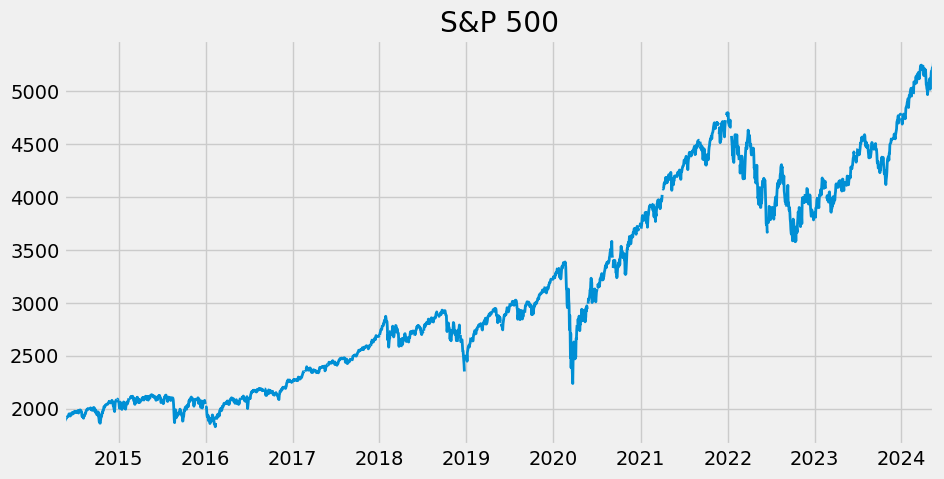

In [8]:
sp500.plot(title='S&P 500', figsize=(10, 5), lw=2)
plt.show()

# 4. Joining different Indicators

In [9]:
unemp = fred.search('unemployment')
unemp

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-05-20   2024-05-20   
UNRATENSA                          UNRATENSA     2024-05-20   2024-05-20   
UNEMPLOY                            UNEMPLOY     2024-05-20   2024-05-20   
NROU                                    NROU     2024-05-20   2024-05-20   
CCSA                                    CCSA     2024-05-20   2024-05-20   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-05-20   2024-05-20   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-05-20   2024-05-20   
LNS14000315                      LNS14000315     2024-05-20   2024-05-20   
LNU04032222                      LNU04032222     2024-05-20   2024-05-20   
LNU04032223                      LNU04032223     2024-05-20   2024-05-20   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-04-01   
UNRATENSA                    1948-01-01      2024-04-01   
UNEMPLOY                     1948-01-01      2024-04-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-05-04   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-04-01   
LNU04032222                  2000-01-01      2024-04-01   
LNU04032223                  2000-01-01      2024-04-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [10]:
unrate = fred.get_series(series_id='UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
Length: 916, dtype: float64

<Axes: >

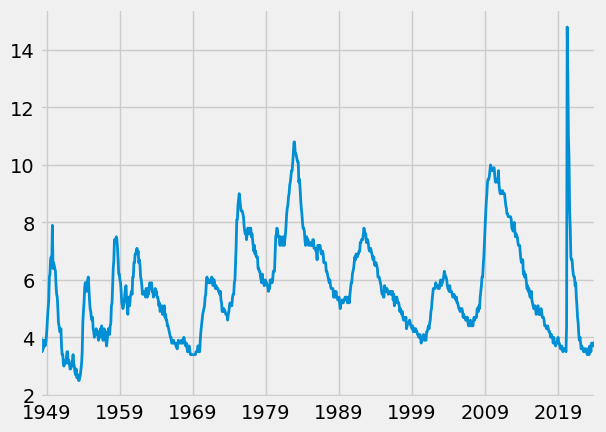

In [11]:
unrate.plot(lw=2)

In [12]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-05-20   2024-05-20   
UNRATENSA      UNRATENSA     2024-05-20   2024-05-20   
LNS14000006  LNS14000006     2024-05-20   2024-05-20   
UNEMPLOY        UNEMPLOY     2024-05-20   2024-05-20   
LNU04000006  LNU04000006     2024-05-20   2024-05-20   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-05-20   2024-05-20   
SCMARI7URN    SCMARI7URN     2024-05-20   2024-05-20   
VAALBE7URN    VAALBE7URN     2024-05-20   2024-05-20   
HAGE124UR      HAGE124UR     2024-05-20   2024-05-20   
MIINGH5URN    MIINGH5URN     2024-05-20   2024-05-20   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-04-01   Monthly               M   
UNRATENSA          1948-01-01      2024-04-01   Monthly               M   
LNS14000006        1972-01-01      2024-04-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-04-01   Monthly               M   
LNU04000006        1972-01-01      2024-04-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-04-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-03-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-03-01   Monthly               M   
HAGE124UR          1990-01-01      2024-03-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-03-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [46]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [47]:
unemp_df

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-05-20   2024-05-20   
LNS14000006                LNS14000006     2024-05-20   2024-05-20   
U6RATE                          U6RATE     2024-05-20   2024-05-20   
CAUR                              CAUR     2024-05-20   2024-05-20   
TXUR                              TXUR     2024-05-20   2024-05-20   
...                                ...            ...          ...   
LNS14000150                LNS14000150     2024-05-20   2024-05-20   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-05-20   2024-05-20   
LBSSA10                        LBSSA10     2024-05-20   2024-05-20   
LBSSA44                        LBSSA44     2024-05-20   2024-05-20   
LRUN25TTUSM156S        LRUN25TTUSM156S     2024-05-20   2024-05-20   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
TXUR                                       Unemployment Rate in Texas   
...                                                               ...   
LNS14000150                           Unemployment Rate - Married Men   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   
LBSSA10                   Labor Force Participation Rate for Delaware   
LBSSA44               Labor Force Participation Rate for Rhode Island   
LRUN25TTUSM156S     Infra-Annual Labor Statistics: Unemployment Ra...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-04-01   Monthly   
LNS14000006               1972-01-01      2024-04-01   Monthly   
U6RATE                    1994-01-01      2024-04-01   Monthly   
CAUR                      1976-01-01      2024-04-01   Monthly   
TXUR                      1976-01-01      2024-04-01   Monthly   
...                              ...             ...       ...   
LNS14000150               1955-01-01      2024-04-01   Monthly   
NEIPTERM156SFRBRIC        1994-01-01      2024-04-01   Monthly   
LBSSA10                   1976-01-01      2024-04-01   Monthly   
LBSSA44                   1976-01-01      2024-04-01   Monthly   
LRUN25TTUSM156S           1955-01-01      2024-04-01   Monthly   

                   frequency_short    units units_short  seasonal_adjustment  \
series id                                                                      
UNRATE                           M  Percent           %  Seasonally Adjusted   
LNS14000006                      M  Percent           %  Seasonally Adjusted   
U6RATE                           M  Percent           %  Seasonally Adjusted   
CAUR                             M  Percent           %  Seasonally Adjusted   
TXUR                             M  Percent           %  Seasonally Adjusted   
...                            ...      ...         ...                  ...   
LNS14000150                      M  Percent           %  Seasonally Adjusted   
NEIPTERM156SFRBRIC               M  Percent           %  Seasonally Adjusted   
LBSSA10                          M  Percent           %  Seasonally Adjusted   
LBSSA44                          M  Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S                  M  Percent           %  Seasonally Adjusted   

                   seasonal_adjustment_short               last_updated  \
series id                                                                 
UNRATE                                    SA  2024-05-03 07:45:01-05:00   
LNS14000006                               SA  2024

In [48]:
# Filtering to include rows where the 'title' column contains the phrase 'Unemployment Rate in '
# or where the 'title' column is exactly 'Unemployment Rate'
filtered_unemp_df = unemp_df[unemp_df['title'].str.contains(r'Unemployment Rate in \w+', regex=True) | (unemp_df['title'] == 'Unemployment Rate')]

In [49]:
filtered_unemp_df

id realtime_start realtime_end  \
series id                                                                
UNRATE                              UNRATE     2024-05-20   2024-05-20   
CAUR                                  CAUR     2024-05-20   2024-05-20   
TXUR                                  TXUR     2024-05-20   2024-05-20   
NYUR                                  NYUR     2024-05-20   2024-05-20   
FLUR                                  FLUR     2024-05-20   2024-05-20   
PAUR                                  PAUR     2024-05-20   2024-05-20   
OHUR                                  OHUR     2024-05-20   2024-05-20   
MIUR                                  MIUR     2024-05-20   2024-05-20   
ALUR                                  ALUR     2024-05-20   2024-05-20   
MAUR                                  MAUR     2024-05-20   2024-05-20   
NCUR                                  NCUR     2024-05-20   2024-05-20   
ILUR                                  ILUR     2024-05-20   2024-05-20   
NJUR                                  NJUR     2024-05-20   2024-05-20   
GAUR                                  GAUR     2024-05-20   2024-05-20   
COUR                                  COUR     2024-05-20   2024-05-20   
AZUR                                  AZUR     2024-05-20   2024-05-20   
WIUR                                  WIUR     2024-05-20   2024-05-20   
VAUR                                  VAUR     2024-05-20   2024-05-20   
KYUR                                  KYUR     2024-05-20   2024-05-20   
SCUR                                  SCUR     2024-05-20   2024-05-20   
NMUR                                  NMUR     2024-05-20   2024-05-20   
MNUR                                  MNUR     2024-05-20   2024-05-20   
TNUR                                  TNUR     2024-05-20   2024-05-20   
WAUR                                  WAUR     2024-05-20   2024-05-20   
MDUR                                  MDUR     2024-05-20   2024-05-20   
ORUR                                  ORUR     2024-05-20   2024-05-20   
WVUR                                  WVUR     2024-05-20   2024-05-20   
NVUR                                  NVUR     2024-05-20   2024-05-20   
ARUR                                  ARUR     2024-05-20   2024-05-20   
OKUR                                  OKUR     2024-05-20   2024-05-20   
MOUR                                  MOUR     2024-05-20   2024-05-20   
AKUR                                  AKUR     2024-05-20   2024-05-20   
IAUR                                  IAUR     2024-05-20   2024-05-20   
UTUR                                  UTUR     2024-05-20   2024-05-20   
PRUR                                  PRUR     2024-05-20   2024-05-20   
INUR                                  INUR     2024-05-20   2024-05-20   
LAUR                                  LAUR     2024-05-20   2024-05-20   
HIUR                                  HIUR     2024-05-20   2024-05-20   
LASMT261982000000003  LASMT261982000000003     2024-05-20   2024-05-20   
NDUR                                  NDUR     2024-05-20   2024-05-20   
MTUR                                  MTUR     2024-05-20   2024-05-20   
DCUR                                  DCUR     2024-05-20   2024-05-20   
MSUR                                  MSUR     2024-05-20   2024-05-20   
MEUR                                  MEUR     2024-05-20   2024-05-20   
NEUR                                  NEUR     2024-05-20   2024-05-20   
LASMT391746000000003  LASMT391746000000003     2024-05-20   2024-05-20   
CTUR                                  CTUR     2024-05-20   2024-05-20   
IDUR                                  IDUR     2024-05-20   2024-05-20   
NHUR                                  NHUR     2024-05-20   2024-05-20   
RIUR                                  RIUR     2024-05-20   2024-05-20   
KSUR                                  KSUR     2024-05-20   2024-05-20   
WYUR                                  WYUR     2024-05-20   2024-05-20   
DEUR                                  DEUR  

In [50]:
filtered_unemp_df.index

Index(['UNRATE', 'CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR',
       'ALUR', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR',
       'VAUR', 'KYUR', 'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR',
       'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR',
       'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR', 'DCUR',
       'MSUR', 'MEUR', 'NEUR', 'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR',
       'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR', 'CSOUUR',
       'CNERUR', 'CWSTUR', 'CNEWUR'],
      dtype='object', name='series id')

In [51]:
# Inspecting unique IDs in the DataFrame to identify their values
filtered_unemp_df[filtered_unemp_df['id'].isin(['LASMT261982000000003', 'LASMT391746000000003'])]

id realtime_start realtime_end  \
series id                                                                
LASMT261982000000003  LASMT261982000000003     2024-05-20   2024-05-20   
LASMT391746000000003  LASMT391746000000003     2024-05-20   2024-05-20   

                                                                  title  \
series id                                                                 
LASMT261982000000003  Unemployment Rate in Detroit-Warren-Dearborn, ...   
LASMT391746000000003    Unemployment Rate in Cleveland-Elyria, OH (MSA)   

                     observation_start observation_end frequency  \
series id                                                          
LASMT261982000000003        1990-01-01      2024-03-01   Monthly   
LASMT391746000000003        1990-01-01      2024-03-01   Monthly   

                     frequency_short    units units_short  \
series id                                                   
LASMT261982000000003               M  Percent           %   
LASMT391746000000003               M  Percent           %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
LASMT261982000000003  Seasonally Adjusted                        SA   
LASMT391746000000003  Seasonally Adjusted                        SA   

                                   last_updated popularity notes  
series id                                                         
LASMT261982000000003  2024-05-01 10:08:06-05:00          8  None  
LASMT391746000000003  2024-05-01 10:08:08-05:00         12  None

In [53]:
# Initialising an empty list to store the results
results = []

# Looping through each series ID in the filtered DataFrame
for id in filtered_unemp_df.index:
    # Fetching the time series data from the FRED API for the current series ID
    result = fred.get_series(id)
    # Converting the series data into a DataFrame, naming the column after the series ID
    result = result.to_frame(name=id)
    # Appending the resulting DataFrame to the results list
    results.append(result)

# Concatenating each DataFrames in the results list along the columns (axis=1)
unemp_results = pd.concat(results, axis=1)


In [54]:
unemp_results

UNRATE  CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  \
1948-01-01     3.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01     3.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01     4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01     3.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01     3.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-01     3.7   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.2   
2024-01-01     3.7   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   
2024-02-01     3.9   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   
2024-03-01     3.8   5.3   3.9   4.3   3.2   3.4   3.8   3.9   3.0   2.9   
2024-04-01     3.9   5.3   4.0   4.2   3.3   3.4   4.0   3.9   3.1   2.9   

            NCUR  ILUR  NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-01   3.6   4.7   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   
2024-01-01   3.5   4.7   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   
2024-02-01   3.5   4.8   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   
2024-03-01   3.5   4.8   4.8   3.1   3.7   3.8   3.0   2.9   4.5   3.1   3.8   
2024-04-01   3.5   4.8   4.7   3.1   3.7   3.6   2.9   2.8   4.6   3.2   3.8   

            MNUR  TNUR  WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-01   2.7   3.4   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   
2024-01-01   2.7   3.5   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   
2024-02-01   2.7   3.3   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.6   
2024-03-01   2.7   3.2   4.8   2.5   4.2   4.3   5.1   3.5   3.5   3.3   4.6   
2024-04-01   2.7   3.1   4.8   2.6   4.2   4.3   5.1   3.4   3.5   3.4   4.6   

            IAUR  UTUR  PRUR  INUR  LAUR  HIUR  LASMT261982000000003  NDUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN   NaN                   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN   NaN                   NaN   NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN   NaN                   NaN   NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN   NaN                   NaN   NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN   NaN                   NaN   NaN   
...          ...   ...   ...   ...   ...   ...                   ...   ...   
2023-12-01   3.0   2.8   5.7   3.5   4.0   3.0                   4.0   1.9   
2024-01-01   3.0   2.8   5.7   3.5   4.1   3.1                   3.9   1.9   
2024-02-01   3.0   2.8   5.7   3.5   4.2   3.1                   3.8   2.0   
2024-03-01   2.9   2.8   5.8   3.5   4.4   3.1                   3.8   2.0   
2024-04-01   2.8   2.8   5.8   3.6   4.3   3.1                   NaN   2.0   

            MTUR  DCUR  MSUR  MEUR  NEUR  LASMT391746000000003  CTUR  IDUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN                   NaN   NaN   NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN                   NaN   NaN   NaN   
1948-0

In [55]:
copy_unemp_results = unemp_results.copy()

In [56]:
unemp_states = copy_unemp_results.drop('UNRATE', axis=1)

# Dropping null values
unemp_states = unemp_states.dropna()

In [ ]:
# Creating a dictionary mapping 'series ids' to state names by removing the prefix 'Unemployment Rate in ' from the 'title' column
id2state = filtered_unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

# Renaming the columns of the unemp_states DataFrame using the id2state dictionary
unemp_states.columns = [id2state[col] for col in unemp_states.columns]

In [59]:
unemp_states.head()

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1990-01-01         5.2    6.3       5.2      5.8           5.2   6.0   
1990-02-01         5.2    6.3       5.1      5.8           5.2   5.9   
1990-03-01         5.2    6.3       5.1      5.9           5.2   5.7   
1990-04-01         5.3    6.2       5.0      5.9           5.2   5.6   
1990-05-01         5.4    6.3       5.0      6.0           5.2   5.6   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1990-01-01       7.7      6.7            5.3             3.5       6.3   
1990-02-01       7.6      6.7            5.4             3.5       6.2   
1990-03-01       7.5      6.7            5.6             3.5       6.1   
1990-04-01       7.4      6.7            5.8             3.6       6.1   
1990-05-01       7.4      6.7            6.0             3.7       6.1   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1990-01-01         4.5      5.2       5.2      5.0        4.2       3.9   
1990-02-01         4.6      5.1       5.2      5.2        4.1       3.9   
1990-03-01         4.6      5.1       5.1      5.3        4.1       3.9   
1990-04-01         4.7      5.1       5.1      5.4        4.1       4.0   
1990-05-01         4.7      5.2       5.1      5.4        4.1       4.1   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1990-01-01       5.8             4.7         6.7        4.6        5.0   
1990-02-01       5.8             4.7         6.6        4.6        5.0   
1990-03-01       5.7             4.7         6.5        4.6        5.0   
1990-04-01       5.7             4.7         6.4        4.6        5.1   
1990-05-01       5.7             4.7         6.4        4.6        5.1   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1990-01-01         5.4       3.7     5.1            8.1     4.4       6.7   
1990-02-01         5.3       3.7     5.1            8.0     4.4       6.7   
1990-03-01         5.2       3.7     5.1            8.0     4.3       6.7   
1990-04-01         5.1       3.8     5.1            8.0     4.4       6.7   
1990-05-01         5.1       3.9     5.2            8.1     4.4       6.7   

            Oklahoma  Missouri  Alaska  Iowa  Utah  Puerto Rico  Indiana  \
1990-01-01       5.4       5.6     7.2   4.4   4.5         14.3      5.1   
1990-02-01       5.3       5.6     7.2   4.4   4.5         14.3      5.1   
1990-03-01       5.2       5.5     7.2   4.3   4.4         14.2      5.0   
1990-04-01       5.1       5.5     7.2   4.3   4.4         14.2      5.0   
1990-05-01       5.0       5.5     7.2   4.3   4.3         14.1      5.0   

            Louisiana  Hawaii  Detroit-Warren-Dearborn, MI (MSA)  \
1990-01-01        6.1     2.6                                7.6   
1990-02-01        5.9     2.7                                7.6   
1990-03-01        5.8     2.7                                7.5   
1990-04-01        5.8     2.7                                7.6   
1990-05-01        5.8     2.7                                7.6   

            North Dakota  Montana  the District of Columbia  Mississippi  \
1990-01-01           4.2      5.7                       5.1          7.5   
1990-02-01           4.1      5.7                       5.2          7.5   
1990-03-01           4.1      5.6                       5.3          7.4   
1990-04-01           4.0      5.6                       5.4          7.3   
1990-05-01           4.0      5.8                       5.6          7.2   

            Maine  Nebraska  Cleveland-Elyria, OH (MSA)  Connecticut  Idaho  \
1990-01-01    4.5       2.5                         4.8          4.3    5.3   
1990-02-01    4.5       2.5                         4.8          4.4    5.3   
1990-03-01    4.5       2.4                         4.7          4.5    5.4   
1990-04-01    4.6       2.3                         4.8          4.6    5.4   
1990-05-01    4.7       2.3                         4.8  

In [60]:
unemp_states_plt = unemp_states.copy()

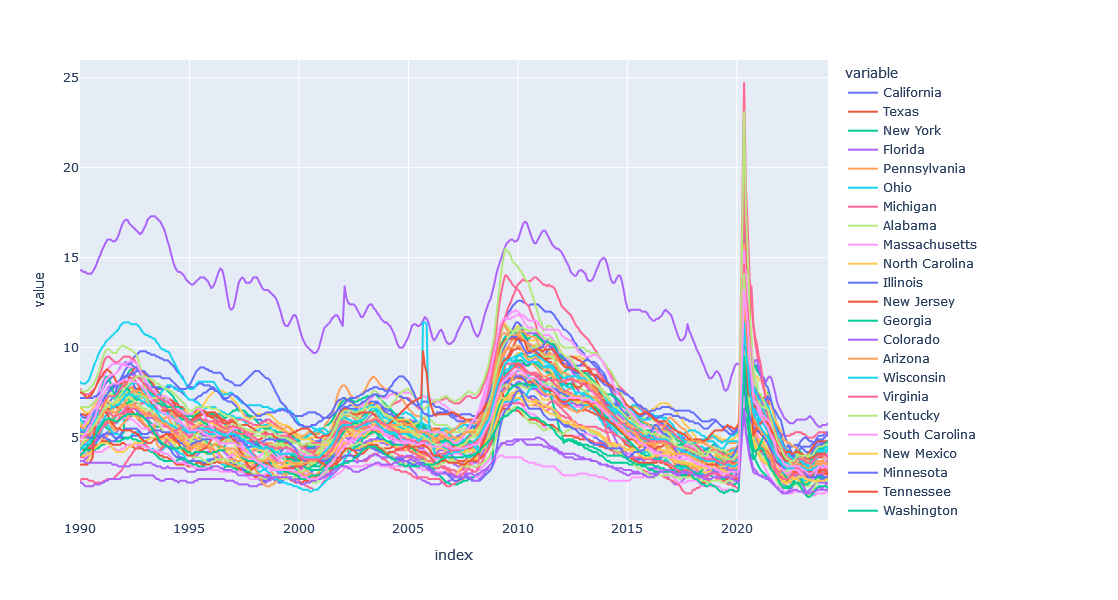

In [61]:
fig = px.line(unemp_states_plt, height=600)
fig.show()

## 4.1 State Unemployment Rates for May 2020

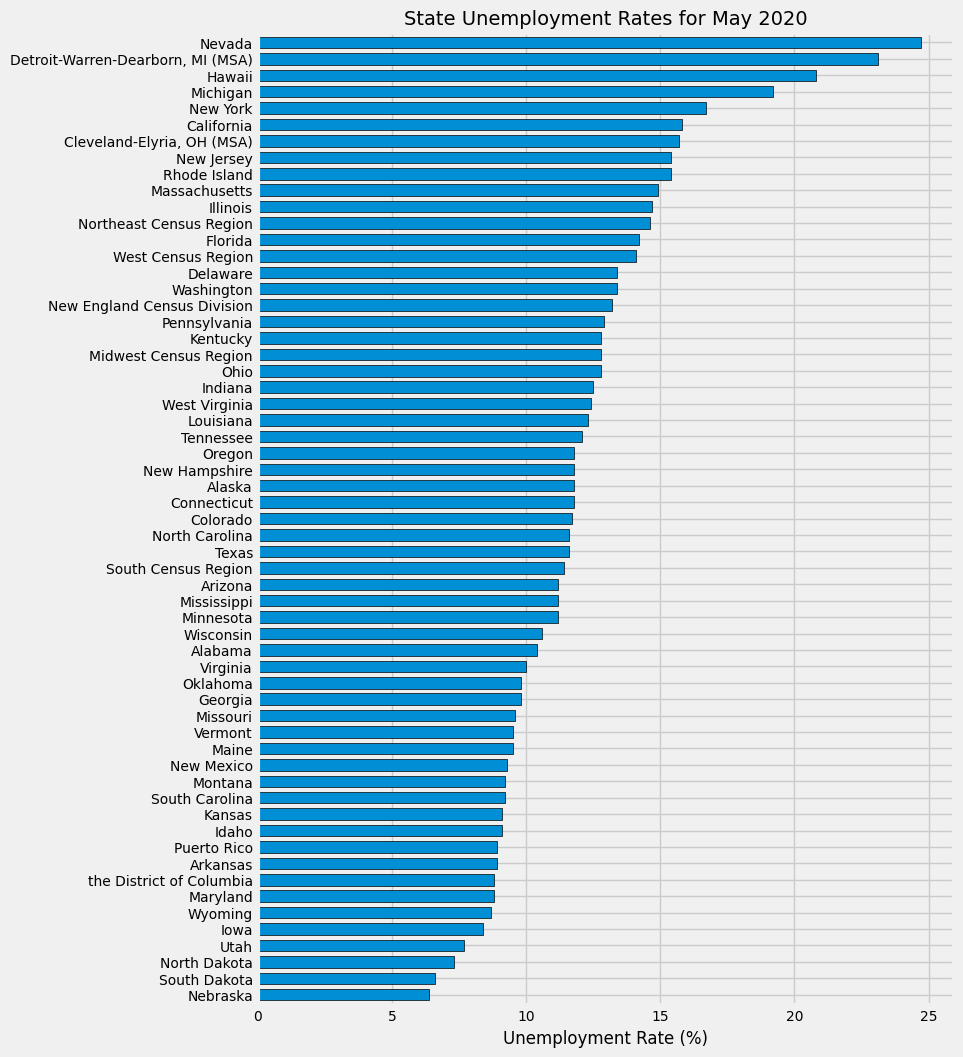

In [63]:
# Filtering for May 2020, transposing it, and sorting the values
ax = unemp_states[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black', legend=False)

# Customising the title and axis labels with smaller font sizes
ax.set_title('State Unemployment Rates for May 2020', fontsize=14)
ax.set_xlabel('Unemployment Rate (%)', fontsize=12)

# Customising the tick parameters for both axes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

# 4.2 Unemployment vs Participation

A key metric for understanding the health of a labour market is the participation rate. This is the percentage of the working-age population that is currently either employed or actively seeking employment.

In [66]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [75]:
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-05-20   2024-05-20   
LNS11300060          LNS11300060     2024-05-20   2024-05-20   
LNS11300002          LNS11300002     2024-05-20   2024-05-20   
LNS11300001          LNS11300001     2024-05-20   2024-05-20   
LNS11324230          LNS11324230     2024-05-20   2024-05-20   
LNS11300012          LNS11300012     2024-05-20   2024-05-20   
LNS11300006          LNS11300006     2024-05-20   2024-05-20   
LRAC25MAUSM156S  LRAC25MAUSM156S     2024-05-20   2024-05-20   
LNS11300036          LNS11300036     2024-05-20   2024-05-20   
LRAC25FEUSM156S  LRAC25FEUSM156S     2024-05-20   2024-05-20   
LNS11327662          LNS11327662     2024-05-20   2024-05-20   
LBSSA06                  LBSSA06     2024-05-20   2024-05-20   
LNS11300028          LNS11300028     2024-05-20   2024-05-20   
LNS11300031          LNS11300031     2024-05-20   2024-05-20   
LBSSA01                  LBSSA01     2024-05-20   2024-05-20   
LNS11300003          LNS11300003     2024-05-20   2024-05-20   
LNS11327660          LNS11327660     2024-05-20   2024-05-20   
LBSSA36                  LBSSA36     2024-05-20   2024-05-20   
LNS11300029          LNS11300029     2024-05-20   2024-05-20   
LBSSA26                  LBSSA26     2024-05-20   2024-05-20   
LBSSA28                  LBSSA28     2024-05-20   2024-05-20   
LNS11300009          LNS11300009     2024-05-20   2024-05-20   
LNS11300032          LNS11300032     2024-05-20   2024-05-20   
LBSSA48                  LBSSA48     2024-05-20   2024-05-20   
LBSSA12                  LBSSA12     2024-05-20   2024-05-20   
LBSSA21                  LBSSA21     2024-05-20   2024-05-20   
LBSSA39                  LBSSA39     2024-05-20   2024-05-20   
LBSSA55                  LBSSA55     2024-05-20   2024-05-20   
LBSSA42                  LBSSA42     2024-05-20   2024-05-20   
LBSSA25                  LBSSA25     2024-05-20   2024-05-20   
LBSSA27                  LBSSA27     2024-05-20   2024-05-20   
LBSSA24                  LBSSA24     2024-05-20   2024-05-20   
LBSSA54                  LBSSA54     2024-05-20   2024-05-20   
LBSSA47                  LBSSA47     2024-05-20   2024-05-20   
LNS11327659          LNS11327659     2024-05-20   2024-05-20   
LBSSA23                  LBSSA23     2024-05-20   2024-05-20   
LBSSA17                  LBSSA17     2024-05-20   2024-05-20   
LBSSA37                  LBSSA37     2024-05-20   2024-05-20   
LBSSA13                  LBSSA13     2024-05-20   2024-05-20   
LBSSA22                  LBSSA22     2024-05-20   2024-05-20   
LBSSA45                  LBSSA45     2024-05-20   2024-05-20   
LBSSA08                  LBSSA08     2024-05-20   2024-05-20   
LBSSA49                  LBSSA49     2024-05-20   2024-05-20   
LBSSA51                  LBSSA51     2024-05-20   2024-05-20   
LBSSA18                  LBSSA18     2024-05-20   2024-05-20   
LNS11300026          LNS11300026     2024-05-20   2024-05-20   
LBSSA29                  LBSSA29     2024-05-20   2024-05-20   
LRIN64TTUSM156S  LRIN64TTUSM156S     2024-05-20   2024-05-20   
LBSSA34                  LBSSA34     2024-05-20   2024-05-20   
LRAC64TTUSM156S  LRAC64TTUSM156S     2024-05-20   2024-05-20   
LBSSA19                  LBSSA19     2024-05-20   2024-05-20   
LBSSA02                  LBSSA02     2024-05-20   2024-05-20   
LNS11300025          LNS11300025     2024-05-20   2024-05-20   
LBSSA53                  LBSSA53     2024-05-20   2024-05-20   
LBSSA04                  LBSSA04     2024-05-20   2024-05-20   
LBSSA35                  LBSSA35     2024-05-20   2024-05-20   
LNS11327689          LNS11327689     2024-05-20   2024-05-20   
LBSSA16                  LBSSA16     2024-05-20   2024-05-20   
LBSSA05                  LBSSA05     2024-05-20   2024-05-20   
LBSSA40                  LBSSA40     2024-05-20   2024-05-20   
LBSSA31                  LBSSA31     2024-05-20   2024-05-20  

In [77]:
filtered_part_df = part_df[part_df['title'].str.contains(r'Labor Force Participation Rate for \w+', regex=True)]

In [85]:
filtered_part_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-05-20   2024-05-20   
LBSSA01    LBSSA01     2024-05-20   2024-05-20   
LBSSA36    LBSSA36     2024-05-20   2024-05-20   
LBSSA26    LBSSA26     2024-05-20   2024-05-20   
LBSSA28    LBSSA28     2024-05-20   2024-05-20   
LBSSA48    LBSSA48     2024-05-20   2024-05-20   
LBSSA12    LBSSA12     2024-05-20   2024-05-20   
LBSSA21    LBSSA21     2024-05-20   2024-05-20   
LBSSA39    LBSSA39     2024-05-20   2024-05-20   
LBSSA55    LBSSA55     2024-05-20   2024-05-20   
LBSSA42    LBSSA42     2024-05-20   2024-05-20   
LBSSA25    LBSSA25     2024-05-20   2024-05-20   
LBSSA27    LBSSA27     2024-05-20   2024-05-20   
LBSSA24    LBSSA24     2024-05-20   2024-05-20   
LBSSA54    LBSSA54     2024-05-20   2024-05-20   
LBSSA47    LBSSA47     2024-05-20   2024-05-20   
LBSSA23    LBSSA23     2024-05-20   2024-05-20   
LBSSA17    LBSSA17     2024-05-20   2024-05-20   
LBSSA37    LBSSA37     2024-05-20   2024-05-20   
LBSSA13    LBSSA13     2024-05-20   2024-05-20   
LBSSA22    LBSSA22     2024-05-20   2024-05-20   
LBSSA45    LBSSA45     2024-05-20   2024-05-20   
LBSSA08    LBSSA08     2024-05-20   2024-05-20   
LBSSA49    LBSSA49     2024-05-20   2024-05-20   
LBSSA51    LBSSA51     2024-05-20   2024-05-20   
LBSSA18    LBSSA18     2024-05-20   2024-05-20   
LBSSA29    LBSSA29     2024-05-20   2024-05-20   
LBSSA34    LBSSA34     2024-05-20   2024-05-20   
LBSSA19    LBSSA19     2024-05-20   2024-05-20   
LBSSA02    LBSSA02     2024-05-20   2024-05-20   
LBSSA53    LBSSA53     2024-05-20   2024-05-20   
LBSSA04    LBSSA04     2024-05-20   2024-05-20   
LBSSA35    LBSSA35     2024-05-20   2024-05-20   
LBSSA16    LBSSA16     2024-05-20   2024-05-20   
LBSSA05    LBSSA05     2024-05-20   2024-05-20   
LBSSA40    LBSSA40     2024-05-20   2024-05-20   
LBSSA31    LBSSA31     2024-05-20   2024-05-20   
LBSSA15    LBSSA15     2024-05-20   2024-05-20   
LBSSA32    LBSSA32     2024-05-20   2024-05-20   
LBSSA30    LBSSA30     2024-05-20   2024-05-20   
LBSSA41    LBSSA41     2024-05-20   2024-05-20   
LBSSA33    LBSSA33     2024-05-20   2024-05-20   
LBSSA50    LBSSA50     2024-05-20   2024-05-20   
LBSSA09    LBSSA09     2024-05-20   2024-05-20   
LBSSA38    LBSSA38     2024-05-20   2024-05-20   
LBSSA46    LBSSA46     2024-05-20   2024-05-20   
LBSSA20    LBSSA20     2024-05-20   2024-05-20   
LBSSA44    LBSSA44     2024-05-20   2024-05-20   
LBSSA11    LBSSA11     2024-05-20   2024-05-20   
LBSSA10    LBSSA10     2024-05-20   2024-05-20   
LBSSA56    LBSSA56     2024-05-20   2024-05-20   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [82]:
part_id2state = filtered_part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

In [87]:
part_id2state

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA27': 'Minnesota',
 'LBSSA24': 'Maryland',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA23': 'Maine',
 'LBSSA17': 'Illinois',
 'LBSSA37': 'North Carolina',
 'LBSSA13': 'Georgia',
 'LBSSA22': 'Louisiana',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [83]:
results = []

for id in filtered_part_df.index:
    result = fred.get_series(id)
    result = result.to_frame(name=id)
    results.append(result)
    
part_states = pd.concat(results, axis=1)

In [88]:
part_states.columns = [part_id2state[col] for col in part_states.columns]

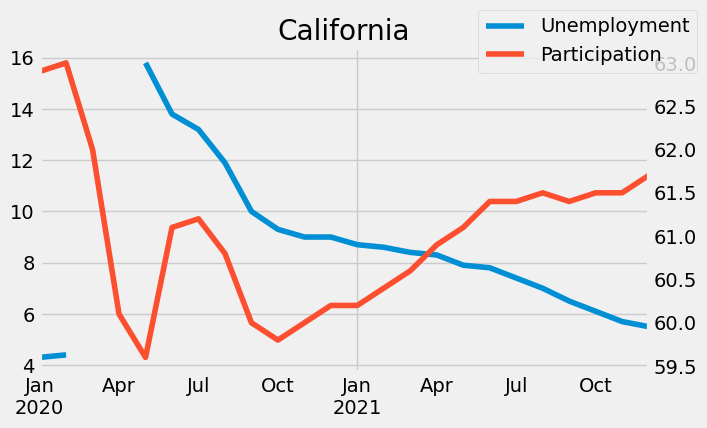

In [143]:
state = 'California'

# Creating a figure and a single subplot with a shared x-axis
fig, ax = plt.subplots(figsize=(7, 4), sharex=True)

# Creating a secondary y-axis for the participation rate on the same subplot
ax2 = ax.twinx()

# Ensuring the 'unemp_states' DataFrame has a monthly frequency
unemp_states2 = unemp_states.asfreq('MS')

# Plotting the unemployment and participation rate on the primary and secondary y-axis, respectively
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state].plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=colour_pal[1])

# Disabling the grid, adding title and legend 
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])

plt.show()

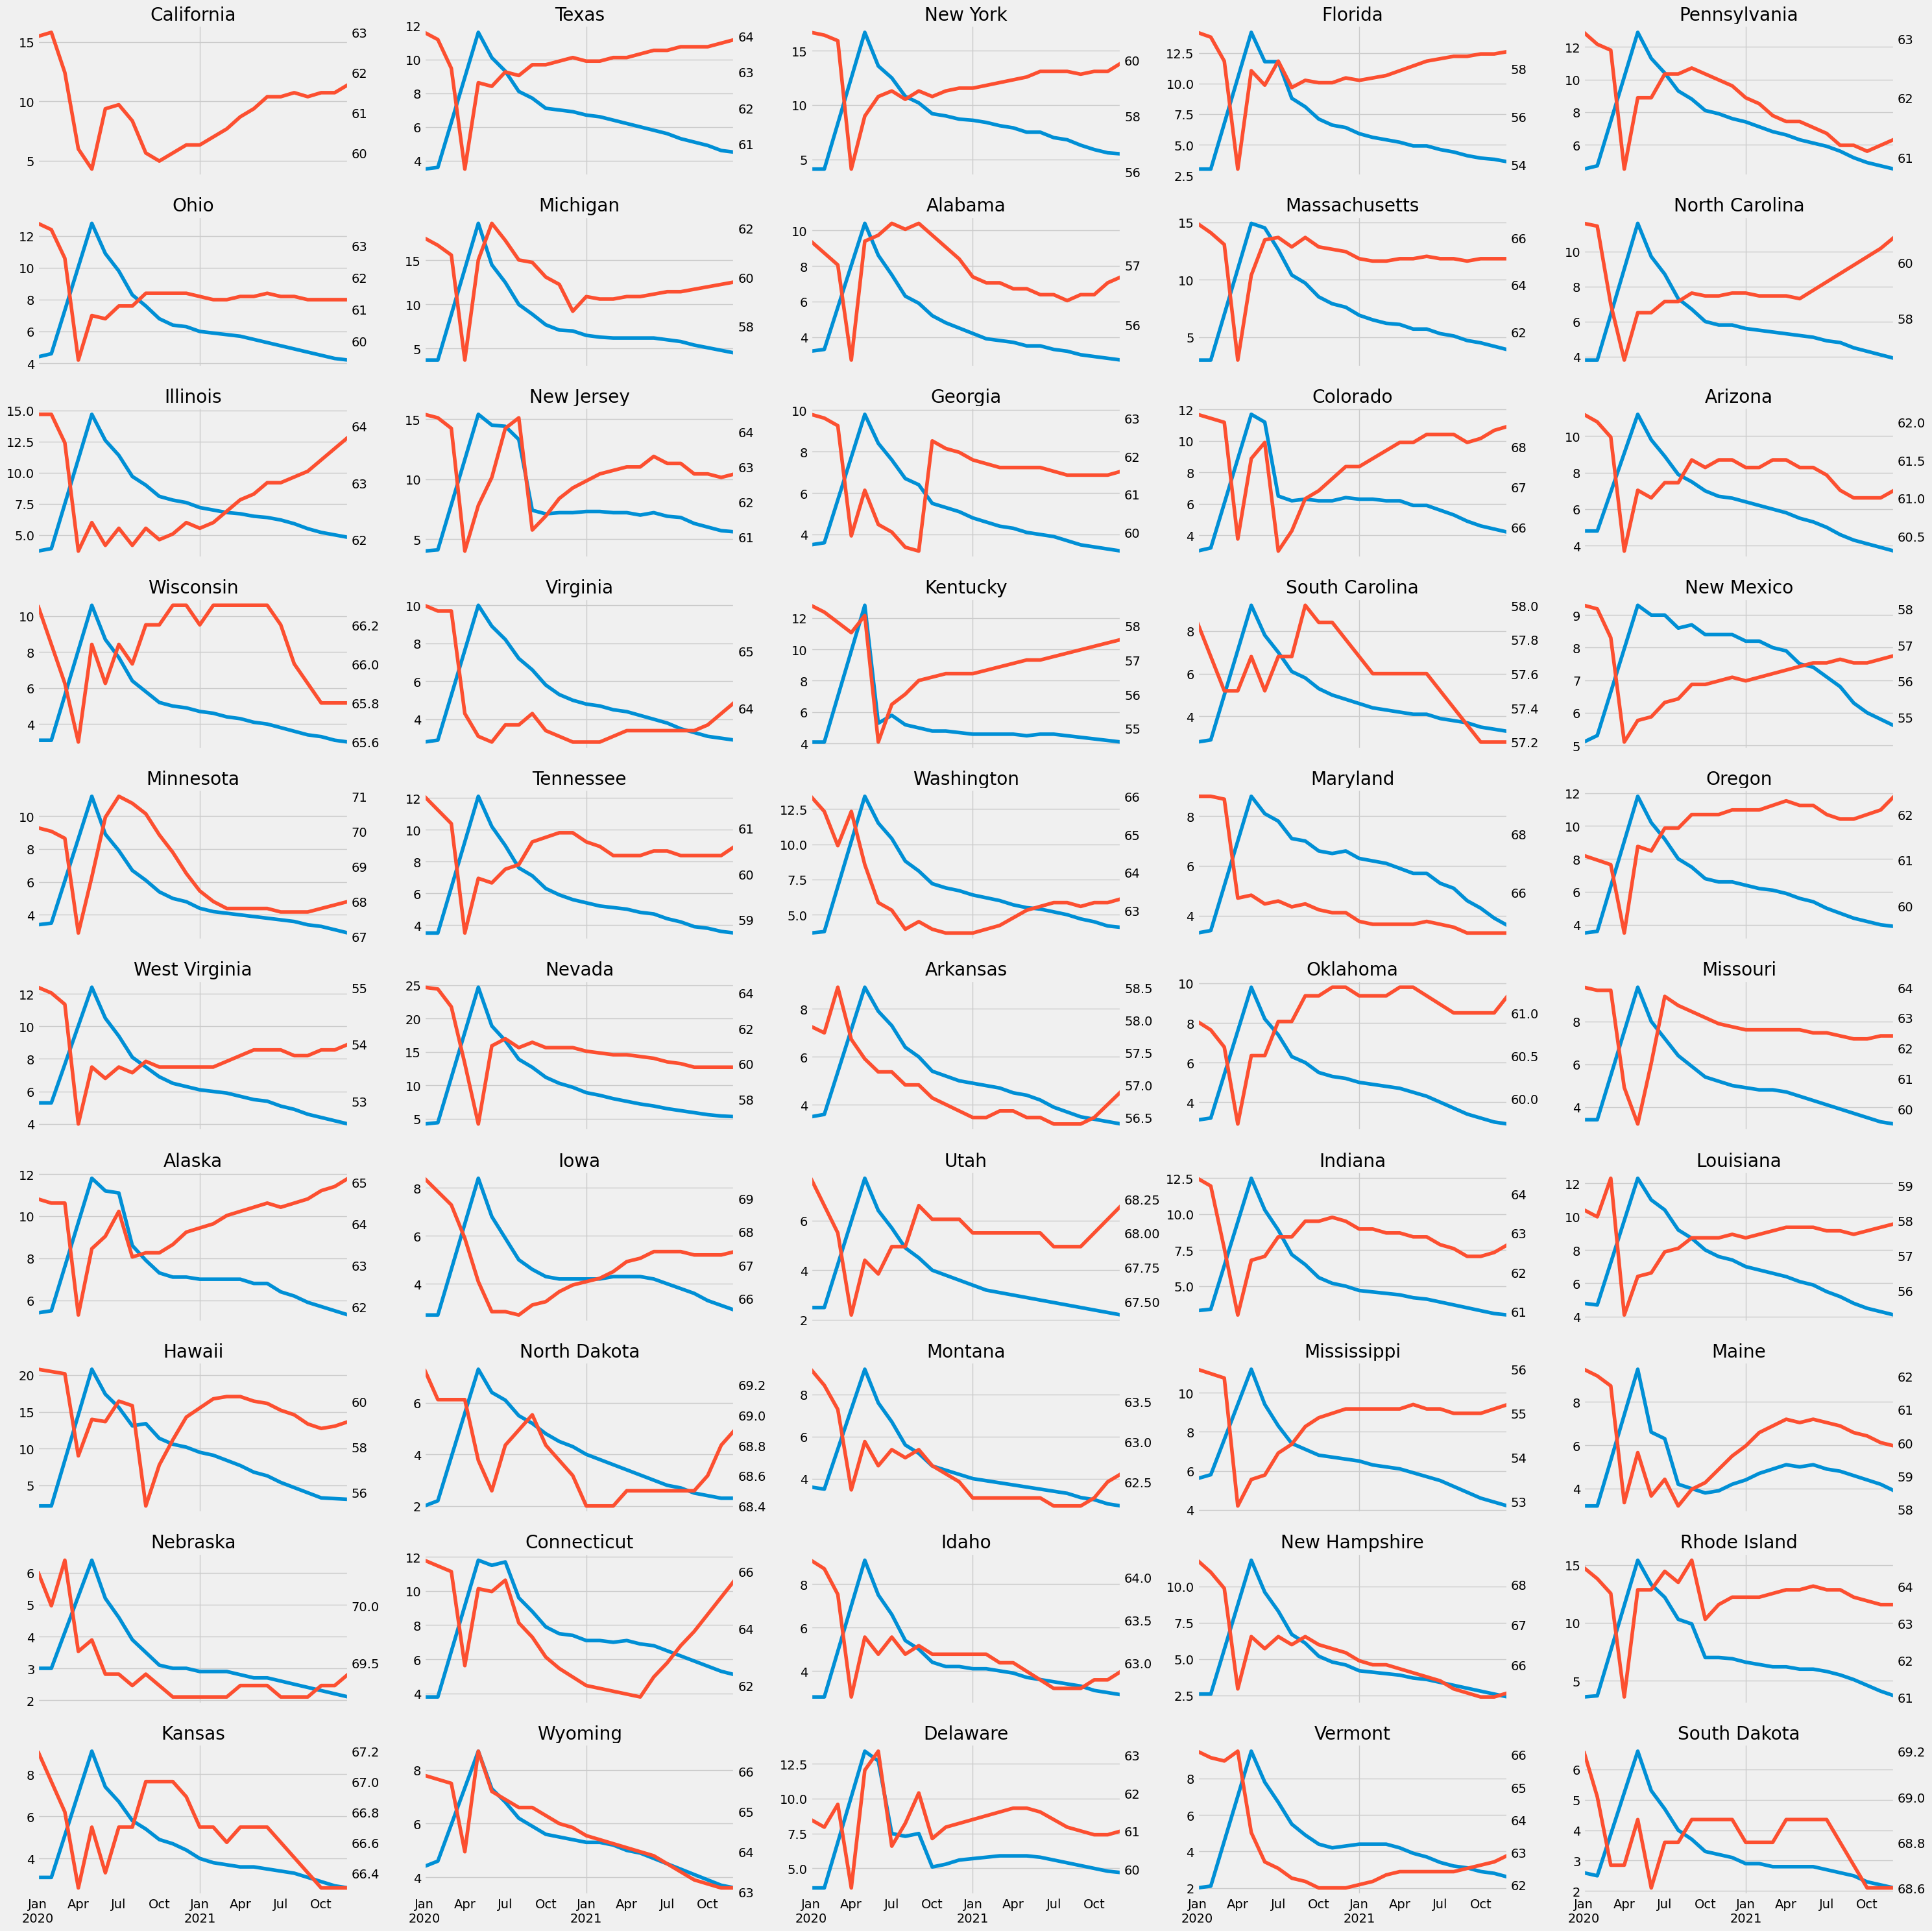

In [138]:
# Creating a figure and a grid of subplots (10 rows and 5 columns) with shared x-axis
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()  # Flatten the 2D array of subplots into a 1D array for easy indexing

# Initialising the subplot index
i = 0

# Looping through each state in the unemp_states DataFrame columns
for state in unemp_states.columns:
    # Skip specific states that should not be plotted
    if state in ["Puerto Rico", "Detroit-Warren-Dearborn, MI (MSA)", "the District of Columbia", 
                 "Cleveland-Elyria, OH (MSA)", "Midwest Census Region", "South Census Region",
                "Northeast Census Region", "West Census Region", "New England Census Division"]:
        continue
    
    # Creating a secondary y-axis for the participation rate on the current subplot
    ax2 = axs[i].twinx()
    
    # Plotting the unemployment rate for the current state on the primary y-axis
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    
    # Plotting the participation rate for the current state on the secondary y-axis
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=colour_pal[1])
    
    # Disabling the grid on the secondary y-axis
    ax2.grid(False)
    
    # Setting the title of the subplot to the state name
    axs[i].set_title(state)
    
    # Incrementing the subplot index
    i += 1

# Adjusting the layout of the subplots to prevent overlap
plt.tight_layout()

plt.show()

# 5. Exploring the Relationship between Unemployment Rate and Consumer Confidence

Consumer confidence is a measure of how optimistic or pessimistic consumers are about the state of the economy. It's a gauge of consumer sentiment. This perception of the economy impacts how much people are willing to spend.
This analysis can provide insights into how consumer confidence impacts the labour market.

In [144]:
concon = fred.search('consumer confidence')
concon

id realtime_start realtime_end  \
series id                                                        
UMCSENT                    UMCSENT     2024-05-20   2024-05-20   
MICH                          MICH     2024-05-20   2024-05-20   
CSCICP03USM665S    CSCICP03USM665S     2024-05-20   2024-05-20   
CSCICP02CNM460S    CSCICP02CNM460S     2024-05-20   2024-05-20   
CSCICP03CNM665S    CSCICP03CNM665S     2024-05-20   2024-05-20   
...                            ...            ...          ...   
CCDIOA17140Q156N  CCDIOA17140Q156N     2024-05-20   2024-05-20   
CCDIOA19100Q156N  CCDIOA19100Q156N     2024-05-20   2024-05-20   
CCDIOA31100Q156N  CCDIOA31100Q156N     2024-05-20   2024-05-20   
CCDIOA33100Q156N  CCDIOA33100Q156N     2024-05-20   2024-05-20   
CCDIOA33460Q156N  CCDIOA33460Q156N     2024-05-20   2024-05-20   

                                                              title  \
series id                                                             
UMCSENT                  University of Michigan: Consumer Sentiment   
MICH                  University of Michigan: Inflation Expectation   
CSCICP03USM665S   Composite Leading Indicators: Composite Consum...   
CSCICP02CNM460S   Consumer Opinion Surveys: Composite Consumer C...   
CSCICP03CNM665S   Composite Leading Indicators: Composite Consum...   
...                                                             ...   
CCDIOA17140Q156N  CredAbility Consumer Distress Index for Cincin...   
CCDIOA19100Q156N  CredAbility Consumer Distress Index for Dallas...   
CCDIOA31100Q156N  CredAbility Consumer Distress Index for Los An...   
CCDIOA33100Q156N  CredAbility Consumer Distress Index for Miami-...   
CCDIOA33460Q156N  CredAbility Consumer Distress Index for Minnea...   

                 observation_start observation_end  frequency frequency_short  \
series id                                                                       
UMCSENT                 1952-11-01      2024-03-01    Monthly               M   
MICH                    1978-01-01      2024-03-01    Monthly               M   
CSCICP03USM665S         1960-01-01      2024-01-01    Monthly               M   
CSCICP02CNM460S         1990-01-01      2024-02-01    Monthly               M   
CSCICP03CNM665S         1990-01-01      2023-12-01    Monthly               M   
...                            ...             ...        ...             ...   
CCDIOA17140Q156N        2005-01-01      2013-01-01  Quarterly               Q   
CCDIOA19100Q156N        2005-01-01      2013-01-01  Quarterly               Q   
CCDIOA31100Q156N        2005-01-01      2013-01-01  Quarterly               Q   
CCDIOA33100Q156N        2005-01-01      2013-01-01  Quarterly               Q   
CCDIOA33460Q156N        2005-01-01      2013-01-01  Quarterly               Q   

                                    units              units_short  \
series id                                                            
UMCSENT                 Index 1966:Q1=100        Index 1966:Q1=100   
MICH                              Percent                        %   
CSCICP03USM665S   Normalised (Normal=100)  Normalised (Normal=100)   
CSCICP02CNM460S        Percentage balance       Percentage balance   
CSCICP03CNM665S   Normalised (Normal=100)  Normalised (Normal=100)   
...                                   ...                      ...   
CCDIOA17140Q156N                  Percent                        %   
CCDIOA19100Q156N                  Percent                        %   
CCDIOA31100Q156N                  Percent                        %   
CCDIOA33100Q156N                  Percent                        %   
CCDIOA33460Q156N                  Percent                        %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UMCSENT           Not Seasonally Adjusted                       NSA   
MICH              Not Seasonally Adjusted                       NSA   


In [145]:
# Defining FRED codes for Unemployment Rate and Consumer Confidence
unemployment_rate_code = 'UNRATE'
consumer_confidence_code = 'CSCICP03USM665S'

# Downloading data from FRED for the past 10 years
unemp_data = fred.get_series(unemployment_rate_code, observation_start='2014-01-01', observation_end='2024-05-21')
concon_data = fred.get_series(consumer_confidence_code, observation_start='2014-01-01', observation_end='2024-05-21')

<Axes: >

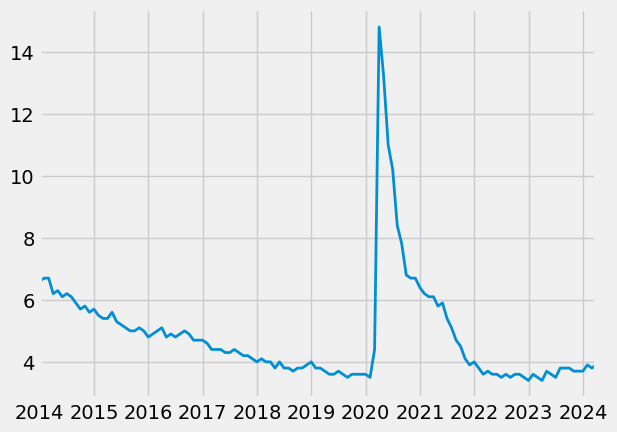

In [148]:
unemp_data.plot(lw=2)

<Axes: >

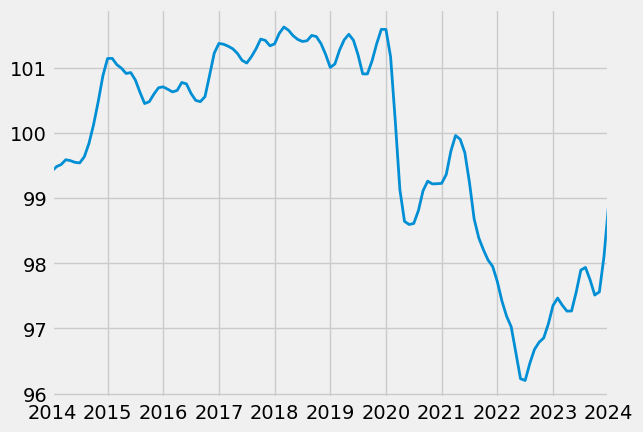

In [149]:
concon_data.plot(lw=2)

In [153]:
# Creating DataFrame
df = pd.DataFrame({'Unemployment Rate': unemp_data, 'Consumer Confidence': concon_data})

In [158]:
df1 = df.copy()

In [159]:
# Checking for missing values
df1.isnull().sum()

Unemployment Rate      0
Consumer Confidence    3
dtype: int64

In [161]:
# Replacing the missing values with the mean
df1['Consumer Confidence'] = df1['Consumer Confidence'].fillna(df1['Consumer Confidence'].mean())

<Axes: >

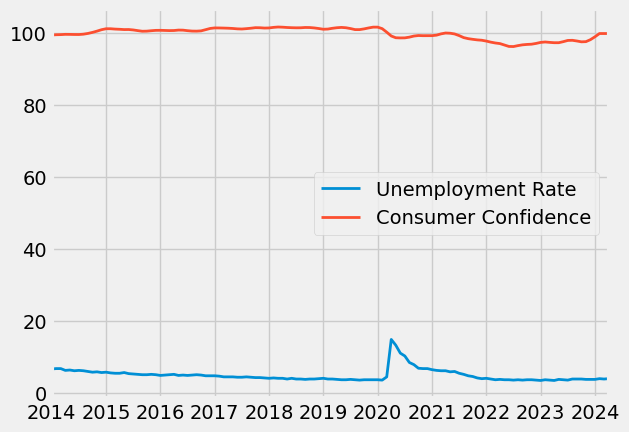

In [164]:
# Visualising the data
df1.plot(lw=2)

## 5.1 Calculating the correlation coefficient

In [165]:
df1['Unemployment Rate'].corr(df1['Consumer Confidence'])

-0.02209969478489299

The correlation coefficient of -0.0221 indicates a **very weak negative** relationship between unemployment rate and consumer confidence. As consumer confidence goes up (more confident consumers), the unemployment rate goes down (fewer unemployed people), and vice versa. Because the correlation coefficient is very close to zero, the negative relationship is insignificant. There is almost no linear relationship between these two variables over the observation period.
It is important to note that correlation does not imply causality. 

## 5.2 Analysing the Great Recession of 2008 (December 2007 - June 2009)

In [166]:
# Defining FRED codes for Unemployment Rate and Consumer Confidence
unemployment_rate_code = 'UNRATE'
consumer_confidence_code = 'CSCICP03USM665S'

# Downloading data from FRED for the past 10 years
unemp_recession = fred.get_series(unemployment_rate_code, observation_start='2007-12-01', observation_end='2009-06-30')
concon_recession = fred.get_series(consumer_confidence_code, observation_start='2007-12-01', observation_end='2009-06-30')

<Axes: >

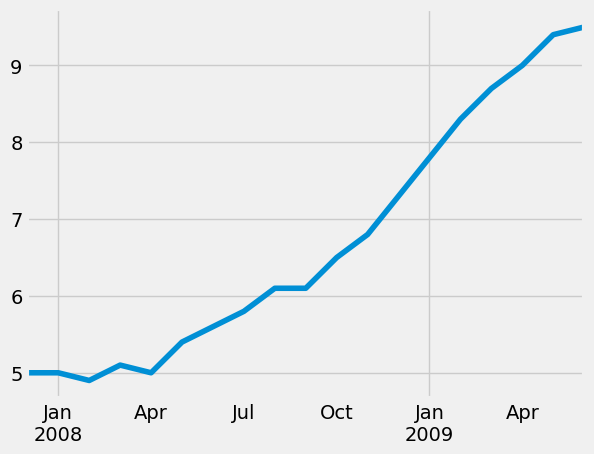

In [167]:
unemp_recession.plot()

<Axes: >

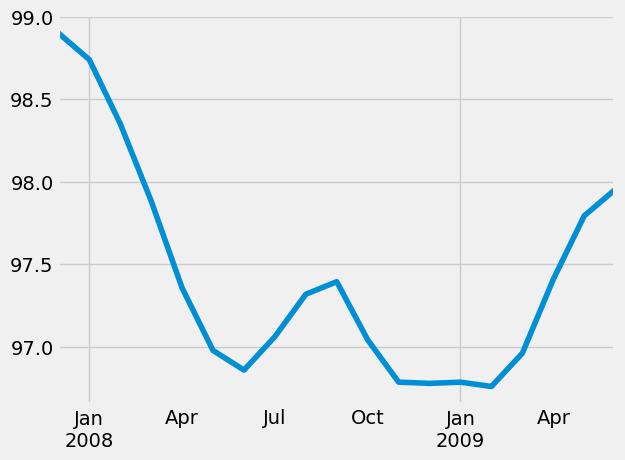

In [168]:
concon_recession.plot()

In [169]:
# Creating DataFrame
df = pd.DataFrame({'Unemployment Rate': unemp_recession, 'Consumer Confidence': concon_recession})

In [170]:
df_re = df.copy()

<Axes: >

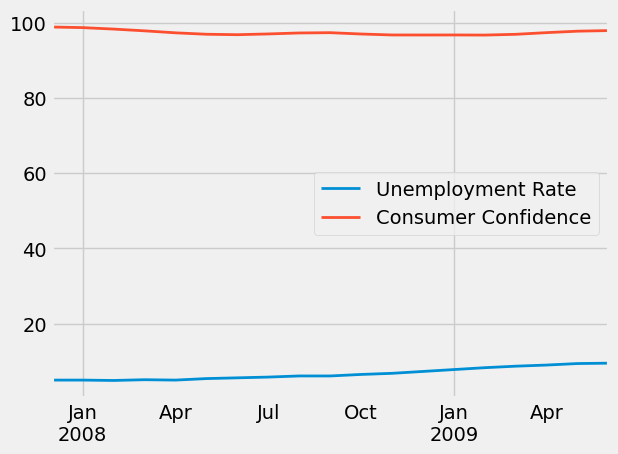

In [171]:
# Visualising the data
df_re.plot(lw=2)

## 5.3 Calculating Correlation

In [172]:
df_re['Unemployment Rate'].corr(df_re['Consumer Confidence'])

-0.3085715457676626

The result indicates a **moderate negative correlation** since the absolute value of the coefficient (-0.308) falls between 0.1 and 0.3. This means there's a noticeable, but not perfect, negative relationship between the variables during the great recession.

## 5.4 Statistical significance

In [174]:
from scipy.stats import pearsonr

unemployment_rate = df_re['Unemployment Rate']
consumer_confidence = df_re['Consumer Confidence']

# Calculating correlation coefficient and p-value
correlation, p_value = pearsonr(unemployment_rate, consumer_confidence)

# Setting significance level (alpha)
alpha = 0.05

# Interpreting the results
if p_value < alpha:
  print(f"There is a statistically significant correlation between Unemployment Rate and Consumer Confidence (p-value: {p_value:.4f})")
else:
  print(f"The observed correlation might be due to chance (p-value: {p_value:.4f})")


The observed correlation might be due to chance (p-value: 0.1987)


# 6. Exploring the Relationship between Unemployment Rate and Job Openings

Total Nonfarm Job Openings are a measure of all jobs that are not filled on the last business day of the month. A job is considered open if a specific position exists and there is work available for it, the job can be started within 30 days, and there is active recruiting for the position. 

In [176]:
job = fred.search('job openings', filter=('units','Rate'))
job

id realtime_start realtime_end  \
series id                                            
JTSJOR          JTSJOR     2024-05-21   2024-05-21   
JTUJOR          JTUJOR     2024-05-21   2024-05-21   
JTSLDR          JTSLDR     2024-05-21   2024-05-21   
JTSQUR          JTSQUR     2024-05-21   2024-05-21   
JTULDR          JTULDR     2024-05-21   2024-05-21   
...                ...            ...          ...   
JTU9100OSR  JTU9100OSR     2024-05-21   2024-05-21   
JTU5200OSR  JTU5200OSR     2024-05-21   2024-05-21   
JTU00NEOSR  JTU00NEOSR     2024-05-21   2024-05-21   
JTU8100OSR  JTU8100OSR     2024-05-21   2024-05-21   
JTU00WEOSR  JTU00WEOSR     2024-05-21   2024-05-21   

                                                        title  \
series id                                                       
JTSJOR                            Job Openings: Total Nonfarm   
JTUJOR                            Job Openings: Total Nonfarm   
JTSLDR                  Layoffs and Discharges: Total Nonfarm   
JTSQUR                                   Quits: Total Nonfarm   
JTULDR                  Layoffs and Discharges: Total Nonfarm   
...                                                       ...   
JTU9100OSR                         Other Separations: Federal   
JTU5200OSR           Other Separations: Finance and Insurance   
JTU00NEOSR  Other Separations: Total Nonfarm in Northeast ...   
JTU8100OSR                  Other Separations: Other Services   
JTU00WEOSR  Other Separations: Total Nonfarm in West Censu...   

           observation_start observation_end frequency frequency_short units  \
series id                                                                      
JTSJOR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTUJOR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTSLDR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTSQUR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTULDR            2000-12-01      2024-03-01   Monthly               M  Rate   
...                      ...             ...       ...             ...   ...   
JTU9100OSR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTU5200OSR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTU00NEOSR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTU8100OSR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTU00WEOSR        2000-12-01      2024-03-01   Monthly               M  Rate   

           units_short      seasonal_adjustment seasonal_adjustment_short  \
series id                                                                   
JTSJOR            Rate      Seasonally Adjusted                        SA   
JTUJOR            Rate  Not Seasonally Adjusted                       NSA   
JTSLDR            Rate      Seasonally Adjusted                        SA   
JTSQUR            Rate      Seasonally Adjusted                        SA   
JTULDR            Rate  Not Seasonally Adjusted                       NSA   
...                ...                      ...                       ...   
JTU9100OSR        Rate  Not Seasonally Adjusted                       NSA   
JTU5200OSR        Rate  Not Seasonally Adjusted                       NSA   
JTU00NEOSR        Rate  Not Seasonally Adjusted                       NSA   
JTU8100OSR        Rate  Not Seasonally Adjusted                       NSA   
JTU00WEOSR        Rate  Not Seasonally Adjusted                       NSA   

                        last_updated popularity notes  
series id                                              
JTSJOR     2024-05-01 09:10:04-05:00         50  None  
JTUJOR     2024-05-01 09:10:07-05:00         13  None  
JTSLDR     2024-05-01 09:10:05-05:00         40  None  
JTSQUR     2024-05-01 09:10:03-05:00         61  None  
JTULDR     2024-05-01 09:10:08-05:00          9  None  
...                              ...

In [177]:
job = job.query('seasonal_adjustment == "Seasonally Adjusted"')
job

id realtime_start realtime_end  \
series id                                            
JTSJOR          JTSJOR     2024-05-21   2024-05-21   
JTSLDR          JTSLDR     2024-05-21   2024-05-21   
JTSQUR          JTSQUR     2024-05-21   2024-05-21   
JTSHIR          JTSHIR     2024-05-21   2024-05-21   
JTS2300JOR  JTS2300JOR     2024-05-21   2024-05-21   
...                ...            ...          ...   
JTS00SOHIR  JTS00SOHIR     2024-05-21   2024-05-21   
JTS9200TSR  JTS9200TSR     2024-05-21   2024-05-21   
JTS00NEHIR  JTS00NEHIR     2024-05-21   2024-05-21   
JTS00WETSR  JTS00WETSR     2024-05-21   2024-05-21   
JTS00MWTSR  JTS00MWTSR     2024-05-21   2024-05-21   

                                                        title  \
series id                                                       
JTSJOR                            Job Openings: Total Nonfarm   
JTSLDR                  Layoffs and Discharges: Total Nonfarm   
JTSQUR                                   Quits: Total Nonfarm   
JTSHIR                                   Hires: Total Nonfarm   
JTS2300JOR                         Job Openings: Construction   
...                                                       ...   
JTS00SOHIR        Hires: Total Nonfarm in South Census Region   
JTS9200TSR                 Total Separations: State and Local   
JTS00NEHIR    Hires: Total Nonfarm in Northeast Census Region   
JTS00WETSR  Total Separations: Total Nonfarm in West Censu...   
JTS00MWTSR  Total Separations: Total Nonfarm in Midwest Ce...   

           observation_start observation_end frequency frequency_short units  \
series id                                                                      
JTSJOR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTSLDR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTSQUR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTSHIR            2000-12-01      2024-03-01   Monthly               M  Rate   
JTS2300JOR        2000-12-01      2024-03-01   Monthly               M  Rate   
...                      ...             ...       ...             ...   ...   
JTS00SOHIR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTS9200TSR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTS00NEHIR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTS00WETSR        2000-12-01      2024-03-01   Monthly               M  Rate   
JTS00MWTSR        2000-12-01      2024-03-01   Monthly               M  Rate   

           units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                               
JTSJOR            Rate  Seasonally Adjusted                        SA   
JTSLDR            Rate  Seasonally Adjusted                        SA   
JTSQUR            Rate  Seasonally Adjusted                        SA   
JTSHIR            Rate  Seasonally Adjusted                        SA   
JTS2300JOR        Rate  Seasonally Adjusted                        SA   
...                ...                  ...                       ...   
JTS00SOHIR        Rate  Seasonally Adjusted                        SA   
JTS9200TSR        Rate  Seasonally Adjusted                        SA   
JTS00NEHIR        Rate  Seasonally Adjusted                        SA   
JTS00WETSR        Rate  Seasonally Adjusted                        SA   
JTS00MWTSR        Rate  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
JTSJOR     2024-05-01 09:10:04-05:00         50  None  
JTSLDR     2024-05-01 09:10:05-05:00         40  None  
JTSQUR     2024-05-01 09:10:03-05:00         61  None  
JTSHIR     2024-05-01 09:10:05-05:00         37  None  
JTS2300JOR 2024-05-01 09:10:08-05:00          8  None  
...                              ...        ...   ...  
JTS00SOHIR 2024-05-01 09:10:21-0

In [178]:
# Defining FRED codes for job openings
job_openings_code = 'JTSJOR'

# Downloading data from FRED for the past 10 years
job_data = fred.get_series(job_openings_code, observation_start='2014-01-01', observation_end='2024-05-21')

<Axes: >

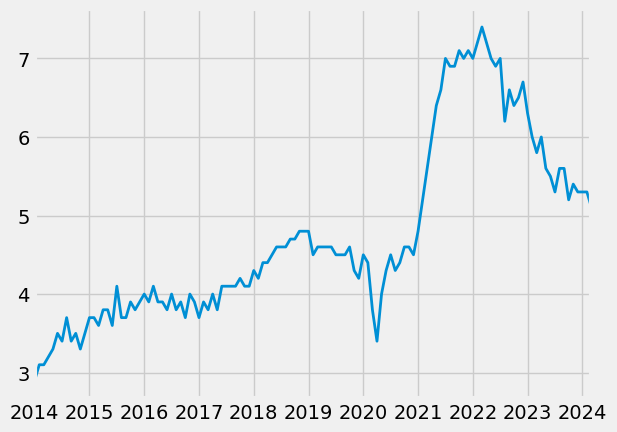

In [179]:
job_data.plot(lw=2)

In [180]:
# Creating DataFrame
df_urjo = pd.DataFrame({'Unemployment Rate': unemp_data, 'Job Openings Total NF': job_data})

In [182]:
df1_urjo = df_urjo.copy()

In [183]:
# Dropping null values
df1_urjo = df1_urjo.dropna()

<Axes: >

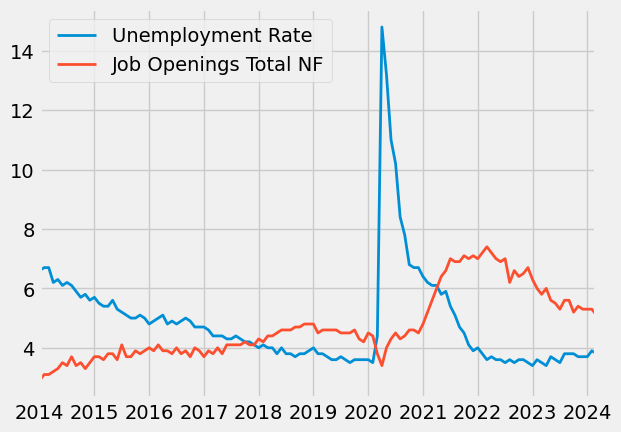

In [185]:
# Visualising the data
df1_urjo.plot(lw=2)

## 6.1 Calculating Correlation

In [188]:
df1_urjo['Unemployment Rate'].corr(df1_urjo['Job Openings Total NF'])

-0.3499573948397224

The result indicates a **weak negative** correlation between unemployment rate and job openings. As the unemployment rate increases, the number of job openings tends to decrease. This is consistent with economic intuition – during periods of high unemployment, there are likely fewer job openings available.

## 6.2 Statistical Significance

In [189]:
from scipy.stats import pearsonr

unemployment_rate = df1_urjo['Unemployment Rate']
job_openings = df1_urjo['Job Openings Total NF']

# Calculating correlation coefficient and p-value
correlation, p_value = pearsonr(unemployment_rate, job_openings)

# Setting significance level (alpha)
alpha = 0.05

# Interpreting the results
if p_value < alpha:
  print(f"There is a statistically significant correlation between Unemployment Rate and Consumer Confidence (p-value: {p_value:.4f})")
else:
  print(f"The observed correlation might be due to chance (p-value: {p_value:.4f})")


There is a statistically significant correlation between Unemployment Rate and Consumer Confidence (p-value: 0.0001)


## 6.3 Granger Causality Test

The Granger causality test examines whether past values (lags) of the first series (unemployment rate) can predict the second series (job openings total nonfarm). 

The p-value indicates the probability that the observed result would occur if the null hypothesis were true. A p-value less than a significance level (0.05) suggests rejecting the null hypothesis, implying Granger causality.

In [192]:
from statsmodels.tsa.stattools import grangercausalitytests

# Setting maximum lags to test (experiment with different values)
max_lags = 5

# Performing Granger causality test
gc_test = grangercausalitytests(df1_urjo, maxlag=max_lags)

print(gc_test)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4635  , p=0.0652  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=3.5508  , p=0.0595  , df=1
likelihood ratio test: chi2=3.5001  , p=0.0614  , df=1
parameter F test:         F=3.4635  , p=0.0652  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8572  , p=0.0239  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=8.0468  , p=0.0179  , df=2
likelihood ratio test: chi2=7.7906  , p=0.0203  , df=2
parameter F test:         F=3.8572  , p=0.0239  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5192  , p=0.0616  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=8.0257  , p=0.0455  , df=3
likelihood ratio test: chi2=7.7687  , p=0.0510  , df=3
parameter F test:         F=2.5192  , p=0.0616  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7572  , p=0.0314  

## Interpretation

* At 1 lag, the p-values are around 0.06 to 0.065, which is slightly above the 0.05 threshold. This suggests weak evidence against the null hypothesis, indicating a possible Granger causality but not strong enough to be statistically significant at the 5% level.
* At 2 lags, the p-values are below 0.05, indicating that the lagged values of the Unemployment Rate significantly improve the prediction of Job openings. This suggests rejecting the null hypothesis and indicates Granger causality at the 5% significance level.
* At 3 lags, the p-values are around the 0.05 threshold. The SSR based Chi2 test has a p-value of 0.0455, suggesting rejecting the null hypothesis, while other tests have p-values slightly above 0.05, indicating weak evidence of Granger causality.
* At 4 lags, the p-values are below 0.05, suggesting rejecting the null hypothesis and indicating Granger causality at the 5% significance level.
* At 5 lags, the p-values are mixed. The SSR based Chi2 test and Likelihood ratio test have p-values below 0.05, suggesting rejecting the null hypothesis and indicating Granger causality, while other tests have p-values slightly above 0.05.

The Granger causality test results suggest that there is evidence of Granger causality at lags 2 and 4, with p-values consistently below 0.05. At lags 1, 3, and 5, the evidence is weaker but still suggests possible Granger causality, with p-values around the 0.05 threshold. This implies that lagged values of the Unemployment Rate can help predict Job Openings, particularly at lags 2 and 4.